# Lead Scoring Case Study
#####  Submitted By: 
- Dipak Kumar Pradhan
- Ritesh Thakre
- Thalinder Singh

###  We are going to perform the below steps in the following order.
- Step 1: Importing Libraries & Data
- Step 2: Reading & Understanding the Data
- Step 3: Data Cleaning
- Step 4: Data Analysis
- Step 5: Data Preparation
- Step 6: Train-Test Split 
- Step 7: Feature Scaling 
- Step 8: Model Building
- Step 9: Model Evaluation 
- Step 10: Making Predictions on test set 

## <strong><span style="color:blue">Step 1: Importing Libraries & Data</span></strong>

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statsmodels libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#supress warnings
import warnings
warnings.filterwarnings("ignore")

#Environment settings
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

## <strong><span style="color:blue">Step 2: Reading & Understanding the Data</span></strong>

In [2]:
# Import the data
df_leads = pd.read_csv('Leads.csv')
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Data Understanding and Inspection

In [3]:
df_leads.shape

(9240, 37)

In [4]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Checking data types of columns along with nulls
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###### All variables have proper data types.

In [6]:
#checking unique number of values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## <strong><span style="color:blue">Step 3: Data Cleaning</span></strong>

In [7]:
# Checking for duplicate rows
# df_leads.duplicated().sum()
df_leads.loc[df_leads.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


###### There are no duplicates in the dataframe df_leads.

In [8]:
# To check for duplicates in Key columns
print(sum(df_leads.duplicated(subset = 'Lead Number')))
print(sum(df_leads.duplicated(subset = 'Prospect ID')))

0
0


As the values in these columns are different for each row, there are just indicative of the ID and may not be important from an analysis point of view. Hence, can be dropped.

In [9]:
print("Before Drop", df_leads.shape)
df_leads.drop(['Lead Number','Prospect ID'],axis=1,inplace=True)
print("After Drop", df_leads.shape)

Before Drop (9240, 37)
After Drop (9240, 35)


###### As we can see, there are select values in many columns. This means that the person did not select any option for the given field. Hence, these can be treated as NULL values.

In [10]:
# List of columns having 'Select' as value
cols_with_select_values = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_values)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [11]:
# convert 'Select' values to nan
df_leads = df_leads.replace('Select', np.nan)

In [12]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_values = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_values)

[]


#### Missing Value Treatment

In [13]:
# Calculating Missing Values Percentage
100*(df_leads.isna().mean()).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

###### We'll drop columns with more than 40% of missing values as it does not make sense to impute these many values.

In [14]:
# creating a function to drop columns &and know the shape before and after dropping
def dropNullCol(data ,percentage=40):
    
    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total no. columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    
    print("Shape before dropping columns: ",data.shape)
    
    data.drop(labels=col_to_drop,axis=1, inplace=True)
    
    print("Shape after dropping columns: ",data.shape)

In [15]:
dropNullCol(df_leads)

Total no. columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index'] 

Shape before dropping columns:  (9240, 35)
Shape after dropping columns:  (9240, 28)


In [16]:
# Checking the percentage of null values for remaining columns
100*(df_leads.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

In [17]:
# Checking data types of columns along with nulls
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

#### Handling Null values in columns with categorical Data

In [18]:
# Select the columns with non-numeric data type
categorical_cols = df_leads.select_dtypes(include=['category','object']).columns.tolist()

# Printing the selected columns
print(categorical_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### Now we will check the count of values in each categorical column with missing values and then decide how to treat the missing values for those columns

In [19]:
col_list= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in col_list:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value counts % for :",i,"\n")
        print(perc,"\n")
        print("*"*50,"\n")

value counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

************************************************** 

value counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.94

##### Inferences:
- City: The City column has 39% missing values. Imputing missing values with "Mumbai" would introduce further skewness to the data. Therefore, it is recommended to drop the City column.

- Specialization: There are 36% missing values in the Specialization column. To address this, we can create an additional category called "Others" to represent the missing values.

- Tags: The Tags column has 36% missing values and is not useful for modeling purposes. Therefore, it can be dropped from the dataset.

- What matters most to you in choosing a course: This variable has 29% missing values. However, 99.95% of customers who provided an answer selected "better career prospects." This extreme skewness suggests that this variable can be dropped.

- What is your current occupation: The missing values in the "Current Occupation" column can be imputed with "Unemployed" as it is the most common category.

- Country: The Country column can be dropped from the dataset.

- Last Activity: The missing values in the "Last Activity" column can be imputed with the label "Email Opened."

- Lead Source: Since "Google" has the highest number of occurrences, the missing values in the "Lead Source" column can be imputed with "Google."

##### So based on the above observation, Dropping the following columns

- 'City'
- 'Tags'
- 'What matters most to you in choosing a course'
- 'Country'

In [20]:
# Dropping Columns
print("Before Drop", df_leads.shape)
df_leads.drop(['City','Tags','What matters most to you in choosing a course','Country'],axis=1,inplace=True)
print("After Drop", df_leads.shape)

Before Drop (9240, 28)
After Drop (9240, 24)


#### Impute the below columns

- 'Specialization' 

- 'Lead Source'

- 'Last Activity'

- 'What is your current occupation'

In [21]:
# Imputing values as per the above inferences
missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [22]:
# Re Checking the percentage of null values for remaining columns
round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Lead Origin                                 0.00
Newspaper Article                           0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Magazine                                    0.00
Lead Source                                 0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

#### Handling Null values in columns with numeric data

In [23]:
# TotalVisits
print("TotalVisits : Value Counts")
print("*********************************")
df_leads.TotalVisits.value_counts().head(10)

TotalVisits : Value Counts
*********************************


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

#### Missing values in 'TotalVisits' can be imputed with mode.

In [24]:
# TotalVisits missing values to be imputed with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace = True)

In [25]:
# Page Views Per Visit
print("Page Views Per Visit : Value Counts")
print("******************************************")
df_leads.TotalVisits.value_counts().head(10)

Page Views Per Visit : Value Counts
******************************************


0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

#### Missing values in 'Page Views Per Visit' can be imputed with mode.

In [26]:
# Page Views Per Visit missing values to be imputed with mode
df_leads["Page Views Per Visit"].fillna(df_leads["Page Views Per Visit"].mode()[0], inplace = True)

In [27]:
# Re Checking the percentage of null values after handling nulls in categorical and numerical columns
round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending = False)

Lead Origin                                 0.0
Lead Source                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

##### There are no more missing values. Data is cleaned.

#### Let's remove some unwanted Columns

In [28]:
# Last Notable Activity
print("Last Notable Activity : Value Counts")
print("*****************************************")
100*df_leads['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity : Value Counts
*****************************************


Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [29]:
# Dropping Columns
print("Before Dropping Columns",df_leads.shape)
df_leads.drop('Last Notable Activity',axis=1,inplace=True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 24)
After Dropping Columns (9240, 23)


#### Handling columns with only one unique value

In [30]:
#check for columns with one unique value
df_leads.describe(include = 'object')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,5,21,2,2,17,19,6,2,1,2,2,2,2,2,1,1,1,1,2
top,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
freq,4886,2904,8506,9238,3540,3380,8290,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352


#### Inferences : Following columns have only one unique value:

- 'I agree to pay the amount through cheque',

- 'Get updates on DM Content',

- 'Update me on Supply Chain Content',

- 'Receive More Updates About Our Courses',

- 'Magazine'

- These columns are of no use as they have only one category of response from customer and can be dropped:

In [31]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",df_leads.shape)
df_leads.drop(cols_drop, axis = 1, inplace = True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 23)
After Dropping Columns (9240, 18)


In [32]:
# Re Checking the percentage of null values after handling categorical and numerical columns
round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending = False)

Lead Origin                               0.0
Lead Source                               0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
What is your current occupation           0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
A free copy of Mastering The Interview    0.0
dtype: float64

#### Checking & Dropping Category Columns that are Skewed

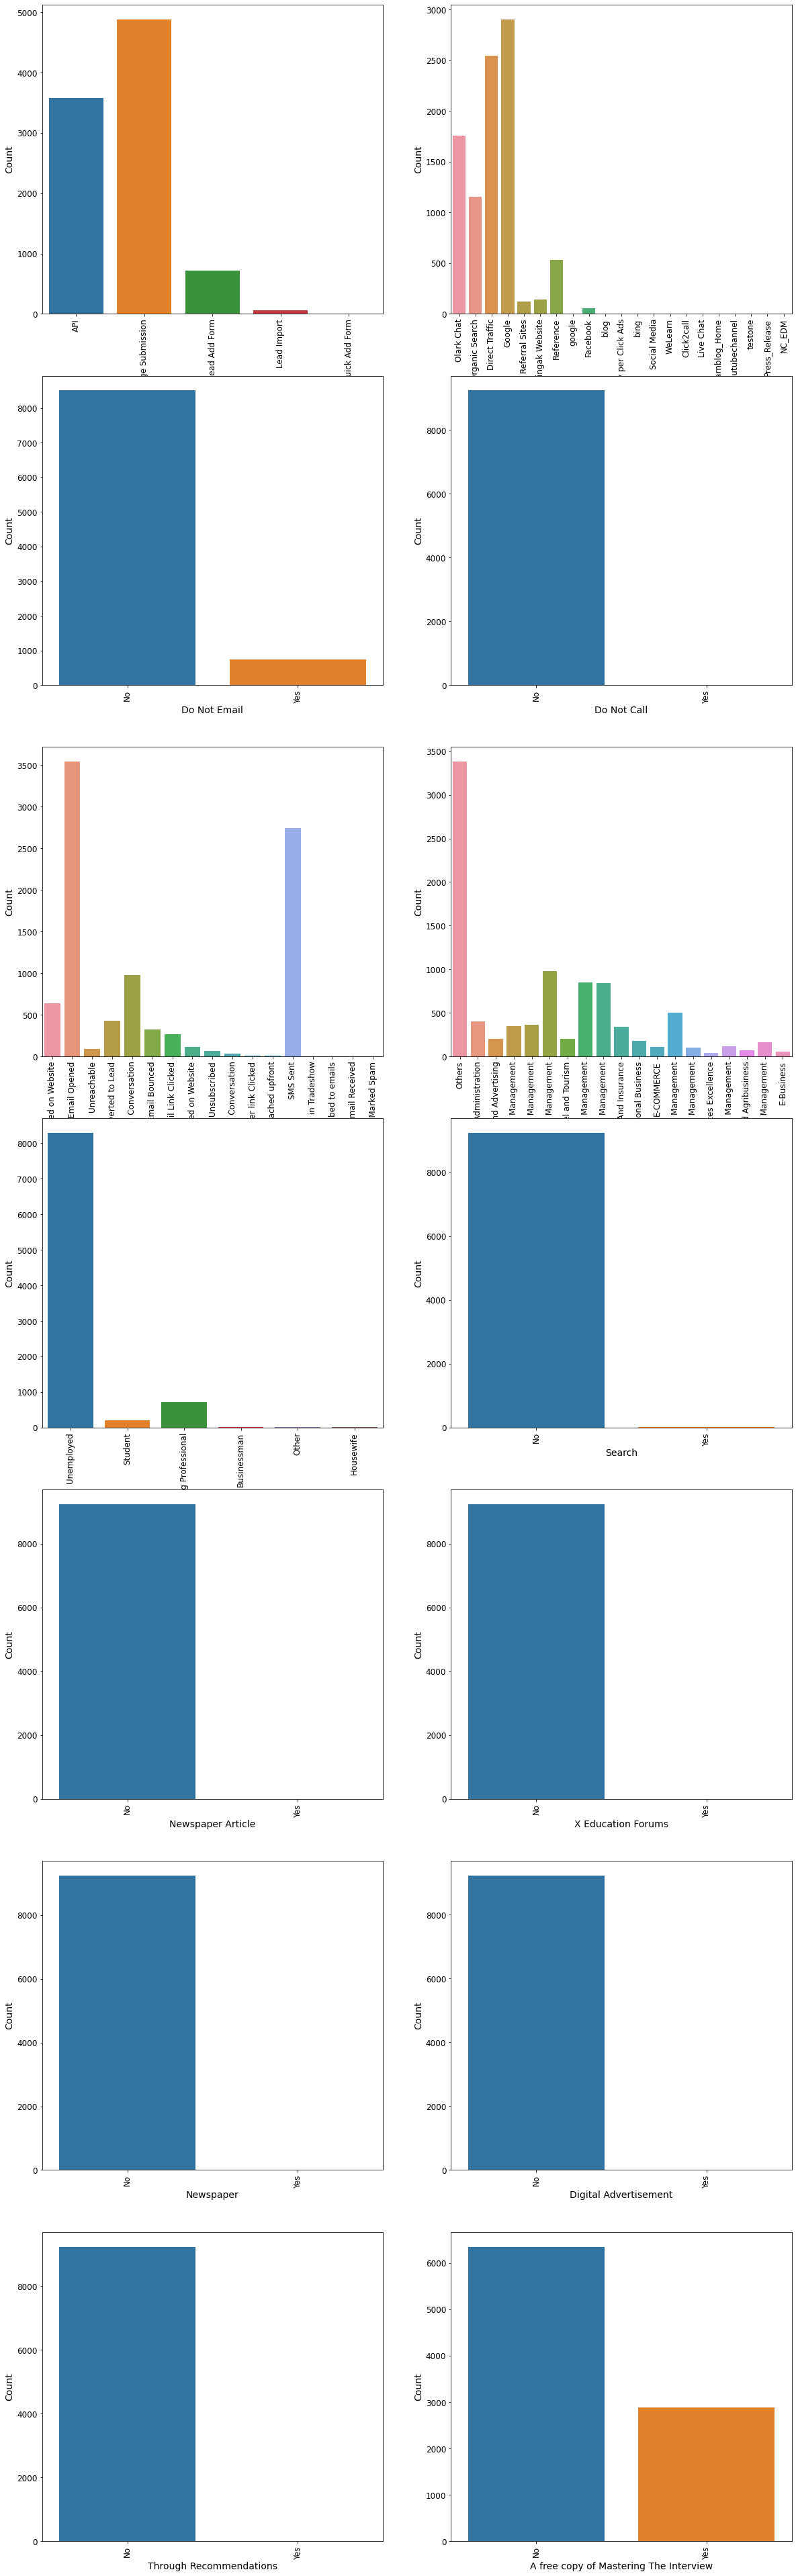

In [33]:
# plotting countplots to get data distribution
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(20, 100))
for i, col in enumerate(categorical_col):
    plt.subplot(10, 2, i+1)
    ax = sns.countplot(x=col, data=df_leads, orient='v')
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)

plt.show()

#### The below columns have data which is highly skewed
- 'Do Not Call',
- 'Search', 
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper', 
- 'Digital Advertisement',
- 'Through Recommendations'. 

Hence these columns will be dropped.

In [34]:
# Dropping categorical columns with highly skewed data
print("Before Drop: ",df_leads.shape)
df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [35]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


### Outlier Analysis

#### Outlier Analysis - For Numerical Columns

In [36]:
def chk_outlier(data,columnList):

    plt.figure(figsize=[20,10])

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)
        sns.boxplot(y=data[j])  
        plt.suptitle("\nChecking Outliers",fontsize=22,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=17,color='blue')

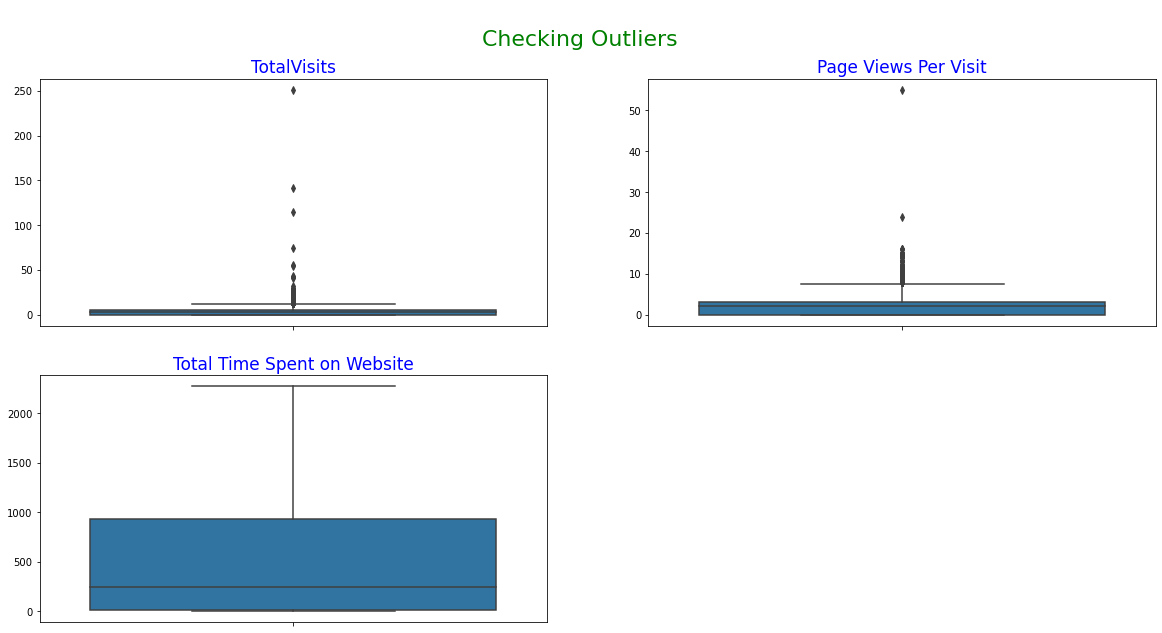

In [37]:
# Checking outliers for numerical variables except target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
 
chk_outlier(df_leads,num_cols)

#### "TotalVisits" & "Page Views Per Visit": Both these variables contain outliers & needs to be treated

#### Outliers treatment

In [38]:
# before outlier treatment
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [39]:
# Defining a function to treat outliers for capping and flooring

def treat_outlier (df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1
        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [40]:
# Checking outliers for numerical variables other than target variable 
cols_to_treat = ["TotalVisits","Page Views Per Visit"]
treat_outlier(df_leads,cols_to_treat)

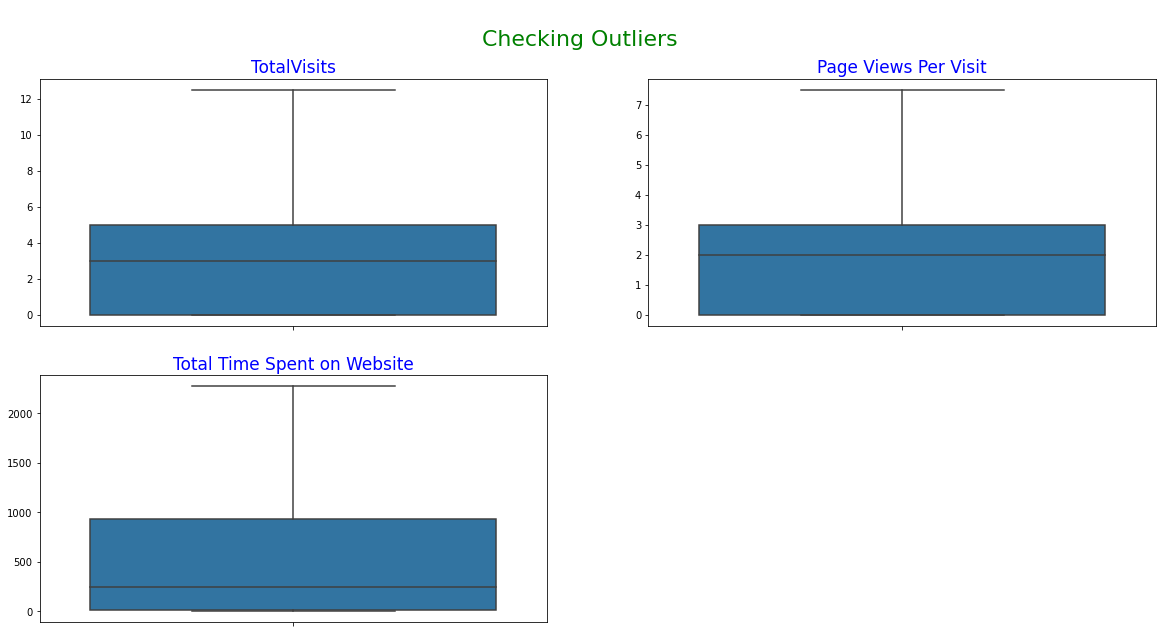

In [41]:
# Checking Boxplot after Outlier Treatment
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
chk_outlier(df_leads,num_cols)

In [42]:
# after outlier treatment detailed percentile values
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,12.500000,2272.000000,7.500000


#### Data Standardisation

In [43]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [44]:
## Categorical Variables 
col_list_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in col_list_cat:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value counts % for :",i,"\n")
        print(perc,"\n")
        print("*"*50,"\n")

value counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

************************************************** 

value counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name:

##### Inferences:


After analyzing the data, it has come to our attention that certain categories/levels within the "Lead Score" and "Last Activity" columns contain a limited number of records. In order to avoid an excessive number of unnecessary columns during the creation of dummy variables, we intend to consolidate these categories into an "Others" category. This approach will enable us to maintain a more organized and concise dataset.

Stadardise values like "Google" & "google" in "Lead Source".

In [45]:
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [46]:
# value_counts percentage after replace
df_leads["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [47]:
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [48]:
# value_counts percentage after replace
df_leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [49]:
# Rename "A free copy of Mastering The Interview" to "Free_copy"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Rename "What is your current occupation" to "Current_occupation"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

##### Inferences:

"Free_copy" and "Do Not Email" : lets map both of them to 1/0

In [50]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)
df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [51]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


## <strong><span style="color:blue">Step 4: Data Analysis</span></strong>

##### Checking if Data is Imbalanced or not

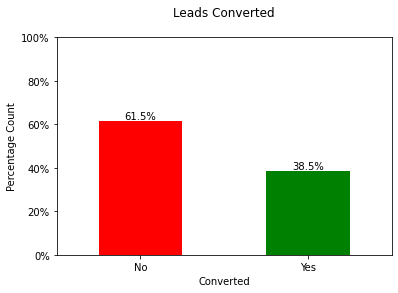

In [52]:
# ploting the results on bar plot
ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Red","Green"])

# Adding and formatting title
plt.title("Leads Converted\n")


# Labeling Axes
plt.xlabel('Converted')
plt.ylabel("Percentage Count")

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)


for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

##### Inferences:

38.5% of the people have converted to leads While 61.5% of the people didn't convert to leads.

In [53]:
# Ratio of Data Imbalance
ratio = (df_leads['Converted'].value_counts(normalize = True).loc[0])/(df_leads['Converted'].value_counts(normalize = True).loc[1])
print("Data Imbalance Ratio: {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio: 1.59 : 1


### Univariate Analysis

#### Univariate Analysis for Categorical Variables

In [54]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

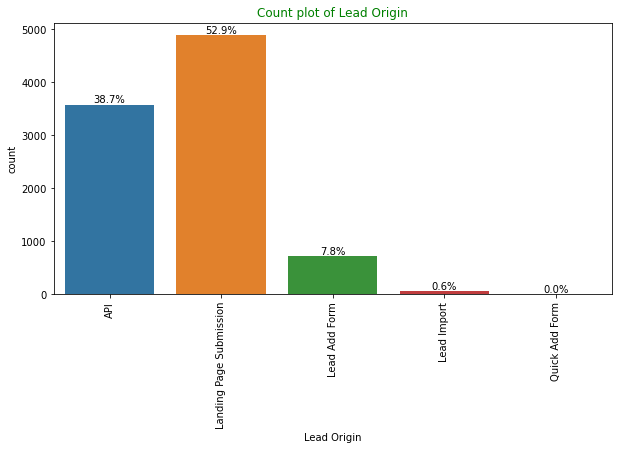

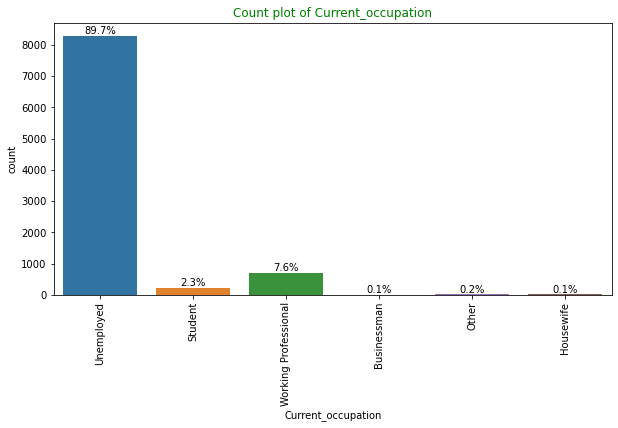

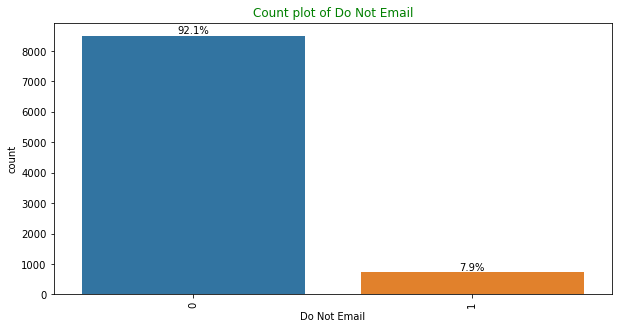

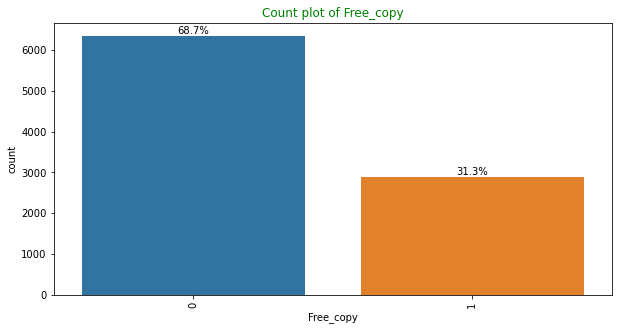

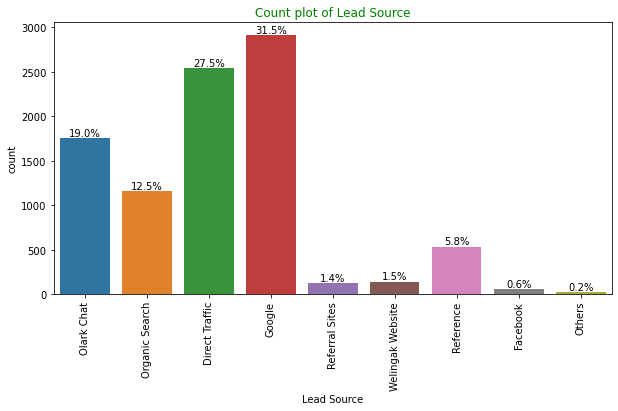

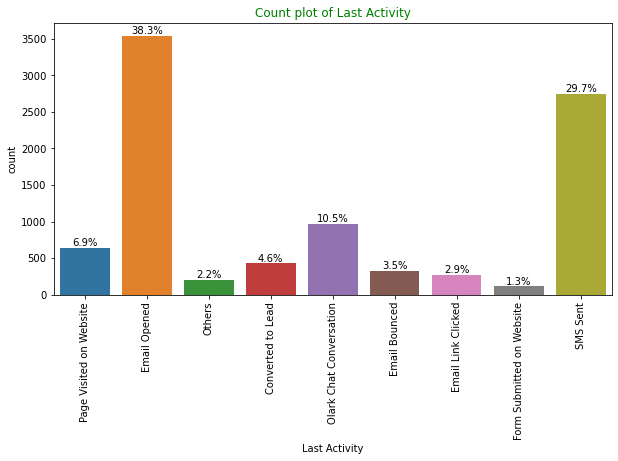

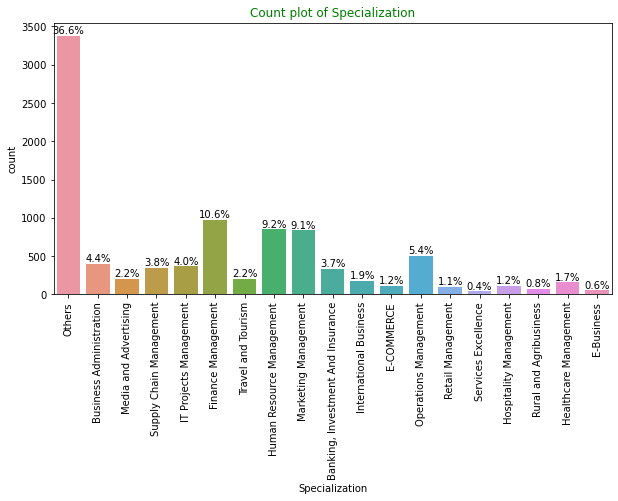

In [55]:
# countplot of columns with its value_counts percentage
for i in cat_cols[:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

##### Inferences:

- Lead Origin: The source for 53% of customers is "Landing Page Submission," while "API" accounts for 39%.

- Current Occupation: Approximately 90% of customers are classified as "Unemployed."

- Do Not Email: Around 92% of individuals have indicated their preference not to receive emails regarding the course.

- Lead Source: The combination of Google and Direct Traffic contributes to 58% of the lead sources.

- Last Activity: The majority of customer interactions, approximately 68%, involve "SMS Sent" and "Email Opened" activities.


### Bivariate Analysis

#### Bivariate Analysis for Categorical Variables

In [56]:
# "Bivariate" tells comparision between Actual Distribution (value_count percentage) from the data and 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="blue", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="RdBu",alpha=0.46)
    
    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='blue')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

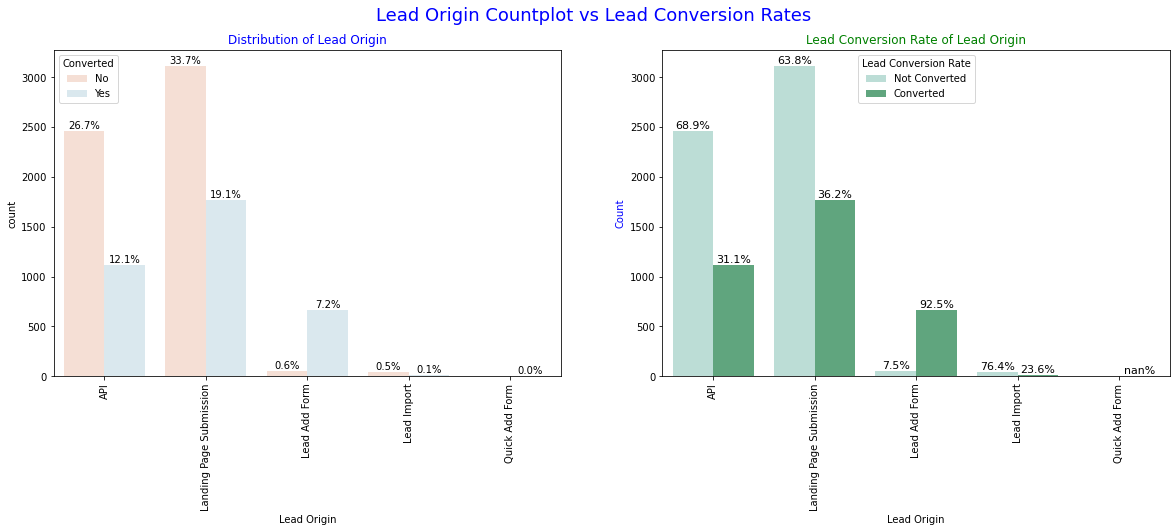

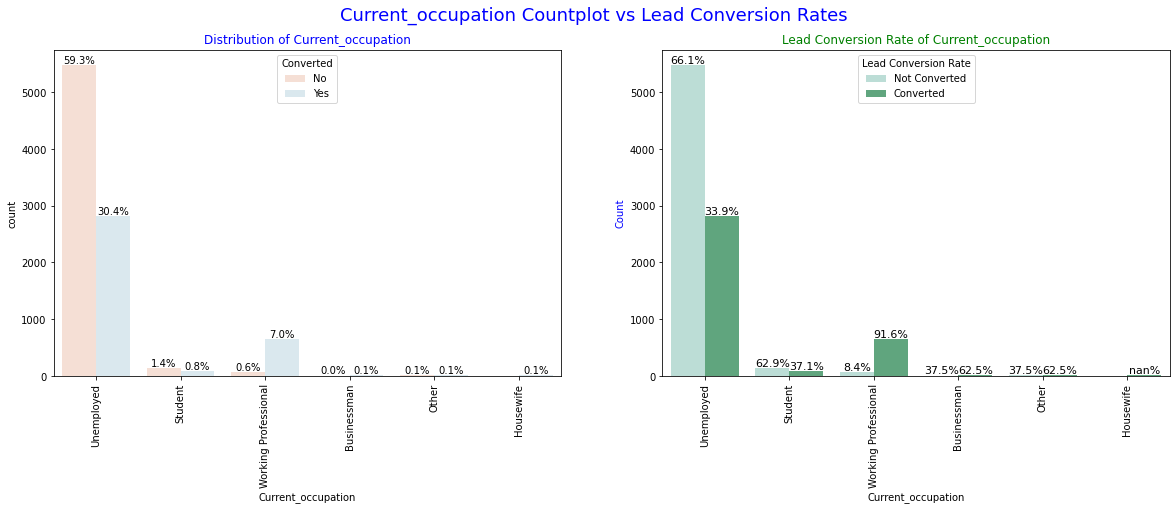

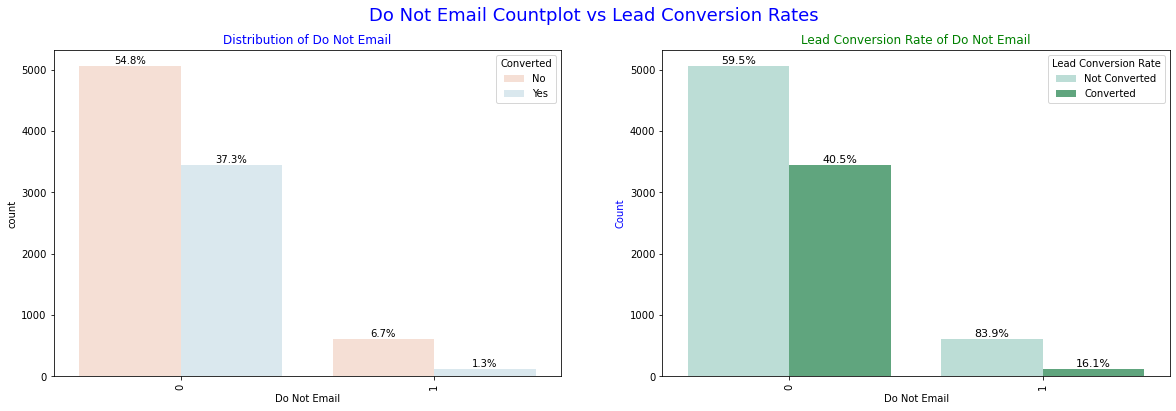

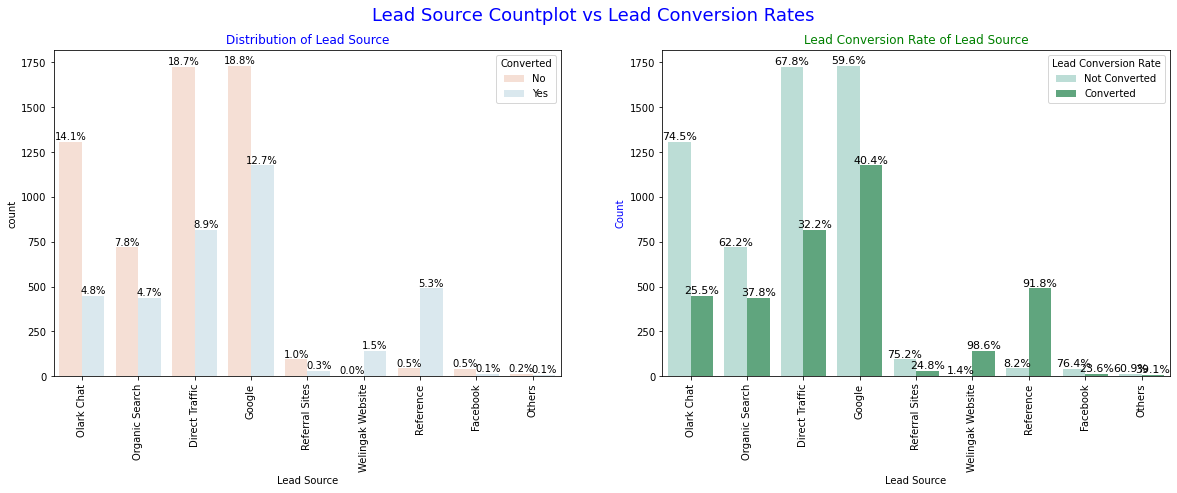

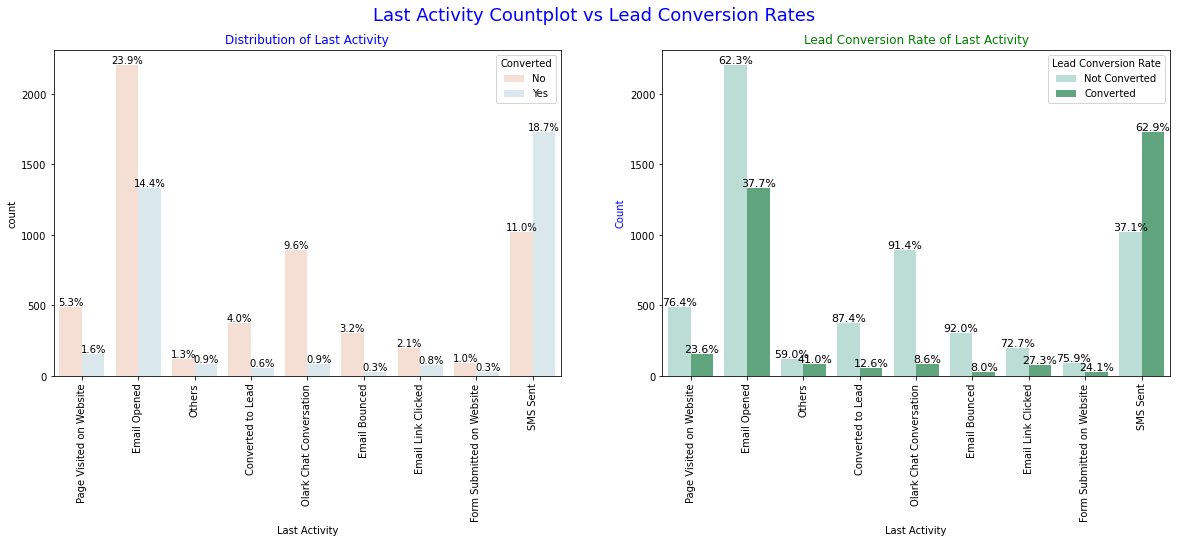

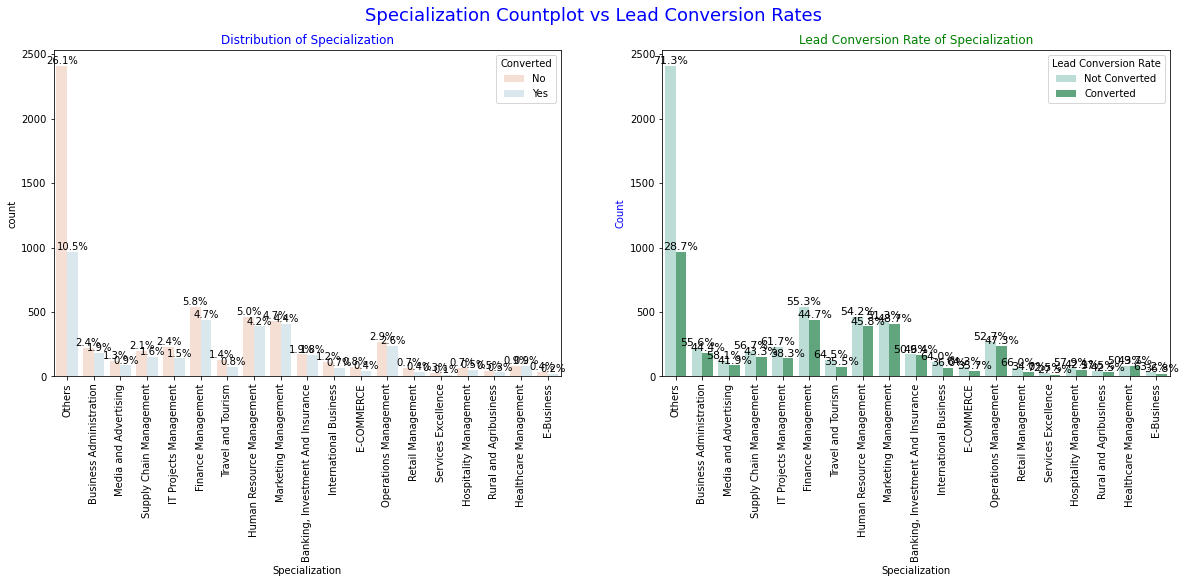

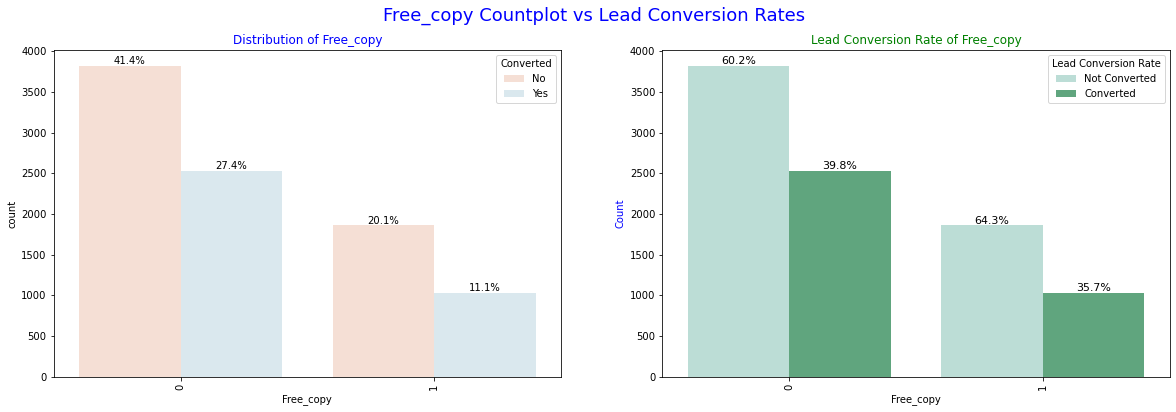

In [57]:
# Bivariate Analysis for all these variables using loop and function
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'

cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate(df_leads,variable_name=i)

Inferences:

- Lead Origin: The majority of leads, approximately 52%, were generated through "Landing Page Submission," and these leads had a lead conversion rate (LCR) of 36%. Another source, the "API," accounted for around 39% of customers, with a lead conversion rate (LCR) of 31%.

- Current Occupation: Unemployed individuals comprised approximately 90% of the customer base, and they had a lead conversion rate (LCR) of 34%. On the other hand, Working Professionals constituted only 7.6% of the total customers but had an impressive lead conversion rate (LCR) of almost 92%.

- Do Not Email: A significant portion, 92%, of the individuals have explicitly chosen not to receive emails regarding the course.

- Lead Source: Among the customers, Google has a lead conversion rate (LCR) of 40%, accounting for 31% of the total customers. Direct Traffic, although contributing to 27% of the customers, has a slightly lower LCR of 32% compared to Google. Organic Search, on the other hand, yields a higher LCR of 37.8%, but it only represents 12.5% of the customer base. Reference is an interesting case with a high LCR of 91%, but it only contributes to approximately 6% of the customers.

- Last Activity: The "SMS Sent" activity stands out with a significant lead conversion rate of 63%, and it is attributed to 30% of the last activities performed by the customers. "Email Opened" represents 38% of the last activities and has a respectable lead conversion rate of 37%.

- Specialization: Marketing Management, HR Management, and Finance Management exhibit noteworthy contributions.


#### Bivariate Analysis for Numerical Variables

<Figure size 1440x360 with 0 Axes>

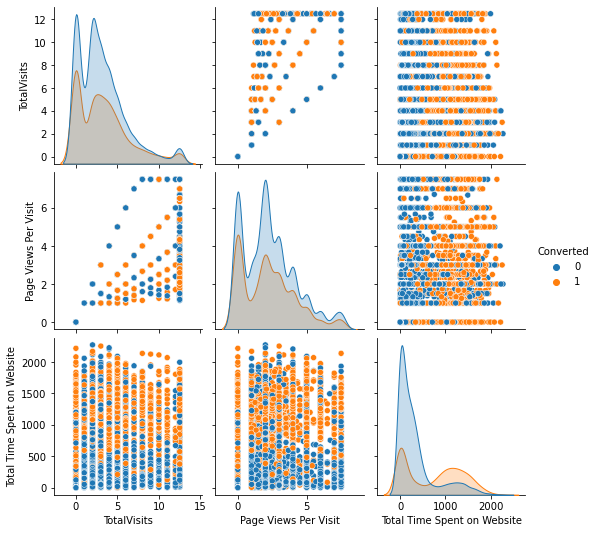

In [58]:
plt.figure(figsize=(20, 5))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")                                  
plt.show()

In [59]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

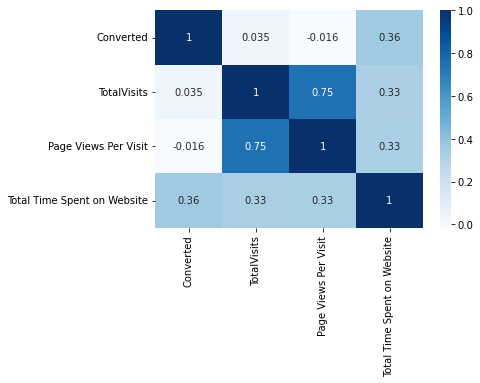

In [60]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

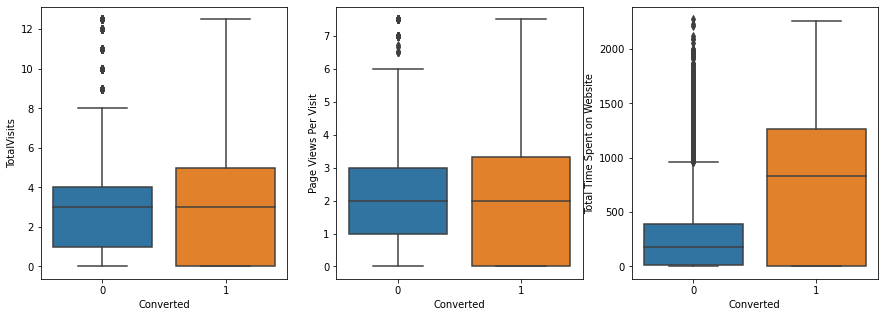

In [61]:
# Boxplot with Converted as hue
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

<strong><span style="color:blue">Inferences:</span></strong> 
- Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

## <strong><span style="color:blue">Step 5: Data Preparation</span></strong>

#### 5.1 Dummy Variables
- For categorical variables with multiple levels, create dummy features

In [62]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [63]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [64]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [65]:
# We have created dummies for the below variables, so we can drop them
df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1)

In [66]:
df_leads.shape

(9240, 49)

## <strong><span style="color:blue">Step 6: Train-Test Split </span></strong>

In [67]:
# map predictor variables to X
X = df_leads.drop('Converted', axis=1)

# map Target variables to y
y = df_leads["Converted"]

In [68]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [69]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [70]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


## <strong><span style="color:blue">Step 7: Feature Scaling </span></strong>

In [71]:
# use standard scaler
scaler = StandardScaler()

# fetching numeric columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [72]:
# X_train dataframe after standard scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [73]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

##### Inference: We have 38.5% Conversion Rate

### 7.1 : check for correlations
- Feature elimination based on correlations

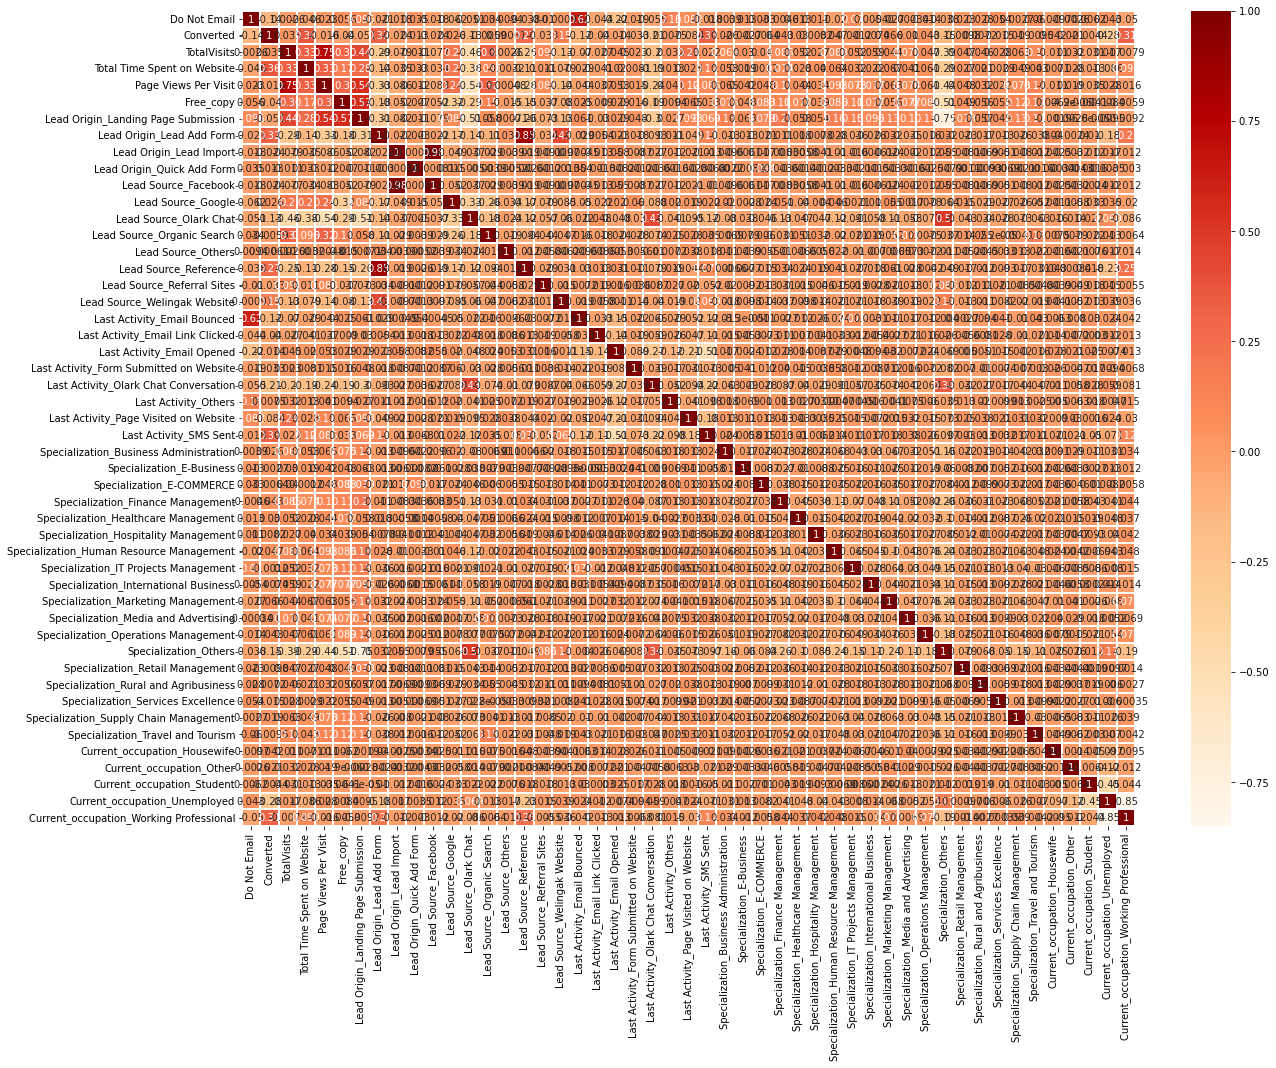

In [74]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="OrRd",annot=True)
plt.show()

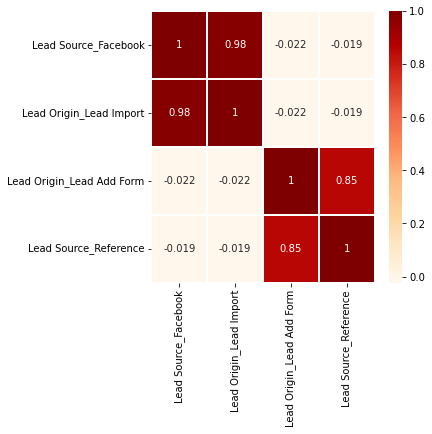

In [75]:
# lets breakdown suspected variables which migh have high correlation with each other
plt.figure(figsize = (5,5))        
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="OrRd",annot=True)
plt.show()

#### Observation : These predictor variables above are very highly correlated with each other near diagonal , it is better that we drop one of these variables . Lets drop 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form'.

In [76]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## <strong><span style="color:blue">Step 8: Model Building </span></strong>

#### Feature Selection Using RFE

In [77]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [78]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 

In [79]:
# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
22,Last Activity_SMS Sent,True,1
41,Current_occupation_Housewife,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1
11,Lead Source_Others,True,1


In [80]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [81]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
      

In [82]:
# User defined function for calculating VIFs for variables
def chk_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [83]:
# Building model using statsmodels
# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  
logm1.params

const                                      -1.033284
Total Time Spent on Website                 1.050544
Lead Origin_Landing Page Submission        -1.272090
Lead Source_Facebook                       -0.696059
Lead Source_Olark Chat                      0.900083
Lead Source_Others                          0.980708
Lead Source_Reference                       2.897685
Lead Source_Welingak Website                5.380227
Last Activity_Email Opened                  0.950623
Last Activity_Olark Chat Conversation      -0.553411
Last Activity_Others                        1.258012
Last Activity_SMS Sent                      2.068763
Specialization_Hospitality Management      -1.072037
Specialization_Others                      -1.193681
Current_occupation_Housewife               23.022209
Current_occupation_Working Professional     2.685466
dtype: float64

In [84]:
#Check summary of model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Mon, 17 Jul 2023   Deviance:                       5465.5
Time:                        18:40:36   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

##### Observation : "Current_occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

### Model 2

In [85]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

In [86]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  
logm2.params

const                                     -1.025075
Total Time Spent on Website                1.049364
Lead Origin_Landing Page Submission       -1.267369
Lead Source_Facebook                      -0.696913
Lead Source_Olark Chat                     0.899051
Lead Source_Others                         0.973897
Lead Source_Reference                      2.917123
Lead Source_Welingak Website               5.379144
Last Activity_Email Opened                 0.949036
Last Activity_Olark Chat Conversation     -0.558345
Last Activity_Others                       1.248172
Last Activity_SMS Sent                     2.058828
Specialization_Hospitality Management     -1.079528
Specialization_Others                     -1.197801
Current_occupation_Working Professional    2.677350
dtype: float64

In [87]:
#Check summary of model

print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Mon, 17 Jul 2023   Deviance:                       5480.7
Time:                        18:40:36   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">Observation:</span></strong> "Lead Source_Facebook" column will be removed from model due to high p-value of 0.187, which is above the accepted threshold of 0.05 for statistical significance.

### Model 3

In [88]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Facebook")

In [89]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  
logm3.params

const                                     -1.040542
Total Time Spent on Website                1.051824
Lead Origin_Landing Page Submission       -1.249311
Lead Source_Olark Chat                     0.916940
Lead Source_Others                         0.981395
Lead Source_Reference                      2.937179
Lead Source_Welingak Website               5.396676
Last Activity_Email Opened                 0.943420
Last Activity_Olark Chat Conversation     -0.558250
Last Activity_Others                       1.248700
Last Activity_SMS Sent                     2.055550
Specialization_Hospitality Management     -1.090368
Specialization_Others                     -1.194330
Current_occupation_Working Professional    2.675678
dtype: float64

In [90]:
#summary
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Mon, 17 Jul 2023   Deviance:                       5482.6
Time:                        18:40:36   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">Observation:</span></strong> "Lead Source_Others" column will be removed from model due to high p-value of 0.055, which is above the accepted threshold of 0.05 for statistical significance.

### Model 4

In [91]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Others")

In [92]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  
logm4.params

const                                     -1.023594
Total Time Spent on Website                1.049789
Lead Origin_Landing Page Submission       -1.258954
Lead Source_Olark Chat                     0.907184
Lead Source_Reference                      2.925326
Lead Source_Welingak Website               5.388662
Last Activity_Email Opened                 0.942099
Last Activity_Olark Chat Conversation     -0.555605
Last Activity_Others                       1.253061
Last Activity_SMS Sent                     2.051879
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Current_occupation_Working Professional    2.669665
dtype: float64

In [93]:
#Summary
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Mon, 17 Jul 2023   Deviance:                       5486.1
Time:                        18:40:36   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">Observation:</span></strong>  Model 4 is looking good and has all significant p-values within the threshold (p-values < 0.05)

- Now lets check VIFs for any multicollinearity.

In [94]:
# Now checking VIFs for all variables in the Model 4 
chk_vif(X_train_rfe)

,Features,VIF
0,Specialization_Others,2.47
1,Lead Origin_Landing Page Submission,2.45
2,Last Activity_Email Opened,2.36
3,Last Activity_SMS Sent,2.20
4,Lead Source_Olark Chat,2.14
5,Last Activity_Olark Chat Conversation,1.72
6,Lead Source_Reference,1.31
7,Total Time Spent on Website,1.24
8,Current_occupation_Working Professional,1.21
9,Lead Source_Welingak Website,1.08


<strong><span style="color:Blue">Observation:</span></strong> No variable needs to be dropped as they all have good VIF values less than 5.
- p values for all variables is less than 0.05
- This model looks good as everything is under control (p-values & VIFs).

## <strong><span style="color:blue">Step 9: Model Evaluation </span></strong> 
- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [95]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm4)          
y_train_pred[:10]

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
dtype: float64

In [96]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [97]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.474082,1871
1,0,0.073252,6795
2,0,0.249087,3516
3,0,0.768973,8105
4,0,0.212973,3934


##### Observation: Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [98]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.474082,1871,0
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


### Confusion Matrix

In [99]:
# Confusion matrix  (Actual / predicted)
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3588  414]
 [ 846 1620]]


### Accuracy

In [100]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8051948051948052


### Other Metrics
- Sensitivity and Specificity

In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
# Checking sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.656934306569343


In [103]:
# Checking specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.896551724137931


In [104]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.10344827586206896


In [105]:
# positive predictive value 
print (TP / float(TP+FP))

0.7964601769911505


In [106]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8092016238159675


### Plotting the ROC Curve

In [107]:
# Function to draw ROC curve 
def draw_roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

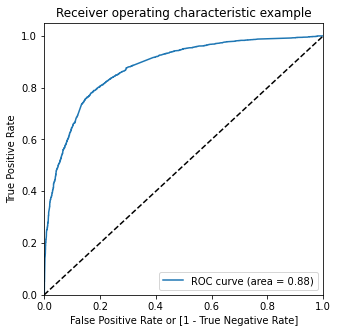

In [109]:
# Drawing ROC curve for Train Set
draw_roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

<strong><span style="color:Blue">Observation:</span></strong> Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

### Finding Optimal Cutoff Point

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0


In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


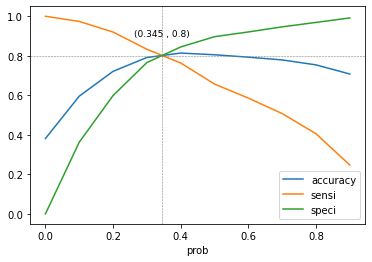

In [112]:
# Let's plot accuracy sensitivity and specificity
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves

speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points

intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point

accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point

cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 

plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

plt.show()

<strong><span style="color:Blue">Observation:</span></strong> 0.345 is the approx. point where all the curves meet, so 0.345 seems to be our `Optimal cutoff point` for probability threshold .
- Lets do mapping again using optimal cutoff point 

In [113]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.474082,1871,1
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


### Calculating all metrics using confusion matrix for Train

In [114]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))


0.8045763760049475


In [115]:
# Function for all Logistic Regression Metrics

def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [116]:
# Finding Confusion metrics for 'y_train_pred_final' df

confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*60,"\n")


print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*60,"\n")

# Using Function to calculate all metrices of logistic regression

logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*60,"\n")

************************************************************ 

Confusion Matrix
[[3230  772]
 [ 492 1974]] 

************************************************************ 

True Negative                    :  3230
True Positive                    :  1974
False Negative                   :  492
False Positve                    :  772
Model Accuracy                   :  0.8046
Model Sensitivity                :  0.8005
Model Specificity                :  0.8071
Model Precision                  :  0.7189
Model Recall                     :  0.8005
Model True Positive Rate (TPR)   :  0.8005
Model False Positive Rate (FPR)  :  0.1929


************************************************************ 



### Precision and recall tradeoff
- Now we will compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80%

In [117]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

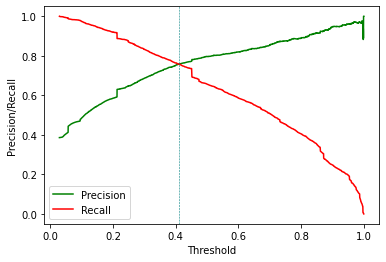

In [118]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels
plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

<strong><span style="color:Blue">Observation:</span></strong> The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

In [119]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [120]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)

y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.474082,1871,1,1
1,0,0.073252,6795,0,0
2,0,0.249087,3516,0,0
3,0,0.768973,8105,1,1
4,0,0.212973,3934,0,0


In [121]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df

confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*60,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*60,"\n")

# Using UDF to calculate all metrices of logistic regression

logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*60,"\n")

************************************************************ 

Confusion Matrix
[[3406  596]
 [ 596 1870]] 

************************************************************ 

True Negative                    :  3406
True Positive                    :  1870
False Negative                   :  596
False Positve                    :  596
Model Accuracy                   :  0.8157
Model Sensitivity                :  0.7583
Model Specificity                :  0.8511
Model Precision                  :  0.7583
Model Recall                     :  0.7583
Model True Positive Rate (TPR)   :  0.7583
Model False Positive Rate (FPR)  :  0.1489


************************************************************ 



<strong><span style="color:Blue">Observation:</span></strong> 
- Based on the metrics presented above, it is observed that when a precision-recall threshold cut-off of 0.41 is used, the values for True Positive Rate, Sensitivity, and Recall have decreased to approximately 75%. However, our business objective requires these metrics to be close to 80%.
- The sensitivity-specificity cut-off threshold of 0.345 yields the desired 80% for these metrics. Hence, we will opt for the sensitivity-specificity view to determine the optimal cut-off for the final predictions.

### <strong><span style="color:blue">Add "Lead Score" Feature to Training dataframe </span></strong> 
- A higher score would mean that the lead is most likely to convert 
- Whereas a lower score would mean that the lead will mostly not get converted.

In [122]:
# Lets add Lead Score 
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.474082,1871,1,47
1,0,0.073252,6795,0,7
2,0,0.249087,3516,0,25
3,0,0.768973,8105,1,77
4,0,0.212973,3934,0,21


## <strong><span style="color:blue">Step 10: Making Predictions on test set </span></strong> 

### Scaling Test dataset

In [123]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Facebook                      2772 non-null   uint8  
 8   Lead Source_Google                        2772 non-null   uint8  
 9   Lead Source_Olark Chat                    2772 non-null   uint8  
 10  Lead Source_Organic Search       

In [124]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Current_occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,0


### Prediction on Test Dataset using final model 

In [125]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 13)

In [126]:
# making prediction using model 4 (final model)
y_test_pred = logm4.predict(X_test_sm)

In [127]:
# top 10 columns

y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [128]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.697934
2376,0.860665
7766,0.889241
9199,0.057065
4359,0.871510


In [129]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [130]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.697934
1,1,2376,0.860665
2,1,7766,0.889241
3,0,9199,0.057065
4,1,4359,0.871510


In [131]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.697934
1,2376,1,0.860665
2,7766,1,0.889241
3,9199,0,0.057065
4,4359,1,0.871510


In [132]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.697934,1
1,2376,1,0.860665,1
2,7766,1,0.889241,1
3,9199,0,0.057065,0
4,4359,1,0.871510,1


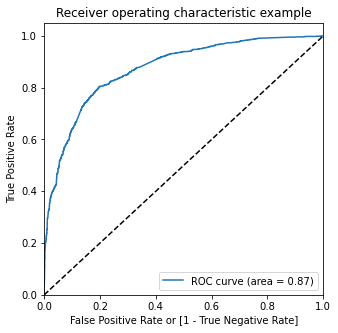

In [133]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )
draw_roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

<strong><span style="color:Blue">Observation:</span></strong> Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

<strong><span style="color:Blue">Observation:</span></strong> 
- After obtaining the final predictions, the subsequent stage involves evaluating the performance of the predictive model on a separate test set.
- This evaluation entails comparing the predicted labels (final_predicted) with the actual labels (Converted) to calculate various performance metrics like accuracy, precision, recall, and more.

### Test Set Model Evaluation
- Calculating all metrics using confusion matrix for Test set

In [134]:
# Finding Confusion metrics for 'y_train_pred_final' 
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")
print("Confusion Matrix")
print(confusion_matrix,"\n")
print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)
print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1353  324]
 [ 221  874]] 

************************************************** 

True Negative                    :  1353
True Positive                    :  874
False Negative                   :  221
False Positve                    :  324
Model Accuracy                   :  0.8034
Model Sensitivity                :  0.7982
Model Specificity                :  0.8068
Model Precision                  :  0.7295
Model Recall                     :  0.7982
Model True Positive Rate (TPR)   :  0.7982
Model False Positive Rate (FPR)  :  0.1932


************************************************** 



<strong><span style="color:Blue">Observation:</span></strong> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
- For Test set
    - Accuracy : 80.34%
    - Sensitivity : 79.82%
    - Specificity : 80.68%
    
These matrics are very close to train set, so out final model logm4 is  performing with good consistency on both Train & Test set

In [135]:
# features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.388662
Lead Source_Reference                      2.925326
Current_occupation_Working Professional    2.669665
Last Activity_SMS Sent                     2.051879
Last Activity_Others                       1.253061
Total Time Spent on Website                1.049789
Last Activity_Email Opened                 0.942099
Lead Source_Olark Chat                     0.907184
Last Activity_Olark Chat Conversation     -0.555605
const                                     -1.023594
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Lead Origin_Landing Page Submission       -1.258954
dtype: float64

<strong><span style="color:Blue">Observation:</span></strong> When a variable has a high positive coefficient, it signifies that the variable has a significant impact on predicting the probability of leads converting to enroll in X-Education's course.

## <strong><span style="color:blue">Adding "Lead Score" Feature to Test dataset </span></strong> 

In [136]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.697934,1,70
1,2376,1,0.860665,1,86
2,7766,1,0.889241,1,89
3,9199,0,0.057065,0,6
4,4359,1,0.871510,1,87


<strong><span style="color:blue">Lead Score: </span></strong> Lead scores are assigned to customers based on various factors.

- Customers with higher lead scores are more likely to convert.
- Customers with lower lead scores have a lower chance of conversion.

# <strong><span style="color:blue">Final Conclusion</span></strong>

##  Train - Test Comparison
### <strong><span style="color:blue">Train Data Set:</span></strong>            

- <strong><span style="color:blue">Accuracy:</span></strong> 80.46%

- <strong><span style="color:blue">Sensitivity:</span></strong> 80.05%

- <strong><span style="color:blue">Specificity:</span></strong> 80.71%

### <strong><span style="color:blue">Test Data Set:</span></strong> 

- <strong><span style="color:blue">Accuracy:</span></strong> 80.34%

- <strong><span style="color:blue">Sensitivity:</span></strong> 79.82%

- <strong><span style="color:blue">Specificity:</span></strong> 80.68%
 

<strong><span style="color:blue">Observation:</span></strong> 

- The evaluation metrics show close similarity, indicating consistent performance of the model across different evaluation metrics in both the training and test datasets.

- Utilizing a cut-off value of 0.345, the model attained a sensitivity of 80.05% in the training set and 79.82% in the test set.

- Sensitivity, in this context, denotes the accurate identification of leads from the total potential leads that convert.

- The target sensitivity set by the CEO of X Education was approximately 80%.

<hr/>

## Model parameters
- The final Logistic Regression Model has 12 features

### <strong><span style="color:blue">Top 3 features that contributing positively to predicting hot leads in the model are:</span></strong> 
- <strong><span style="color:blue">Lead Source_Welingak Website</span></strong>

- <strong><span style="color:blue">Lead Source_Reference</span></strong> 

- <strong><span style="color:blue">Current_occupation_Working Professional</span></strong> 

<strong><span style="color:blue">NOTE: </span></strong> The optimal cutoff probability is determined to be 0.345. Any converted probability exceeding this threshold will be classified as a converted lead, while probabilities lower than 0.345 will be classified as not converted leads
<hr/>

# <strong><span style="color:blue">Final Recommendations</span></strong>

### <strong><span style="color:blue">To increase our Lead Conversion Rates: </span></strong>  

- Emphasize features that have positive coefficients for targeted marketing strategies.
- Create tactics to attract high-quality leads from the most successful lead sources.
- Engage working professionals through personalized messaging.
- Optimize communication channels based on their impact on lead engagement.
- Allocate additional budget for advertising and other initiatives on the Welingak website.
- Offer incentives or discounts for referring leads that convert, and encourage providing more references.
- Implement aggressive targeting strategies towards working professionals due to their high conversion rates and better financial capacity to afford higher fees.


### <strong><span style="color:blue">Areas of improvement: </span></strong>  

- Examine the adverse coefficients found in the available specialization courses.
- Assess the submission process on the landing page to identify areas that can be enhanced.